In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('a1_d2.csv')

data_class0 = data.loc[data['class']==0]
data_class1 = data.loc[data['class']==1]

train0=data_class0.sample(frac=0.8,random_state=200) #random state is a seed value
test0=data_class0.drop(train0.index)

train1 = data_class1.sample(frac=0.8,random_state=200) #random state is a seed value
test1 = data_class1.drop(train1.index)

train = train0.append(train1)
test = test0.append(test1)

In [3]:
m0 = [np.mean(train0.iloc[:,0]),np.mean(train0.iloc[:,1]),np.mean(train0.iloc[:,2])]
m1 = [np.mean(train1.iloc[:,0]),np.mean(train1.iloc[:,1]),np.mean(train1.iloc[:,2])]

cov0 = np.cov([train0.iloc[:,0],train0.iloc[:,1],train0.iloc[:,2]])
cov1 = np.cov([train1.iloc[:,0],train1.iloc[:,1],train1.iloc[:,2]])

sw = cov0 + cov1
m = np.asarray(m0)-np.asarray(m1)
w = np.dot(np.linalg.inv(sw),np.transpose(m))
print(w)

[  0.0688611    0.2235575  -11.31024043]


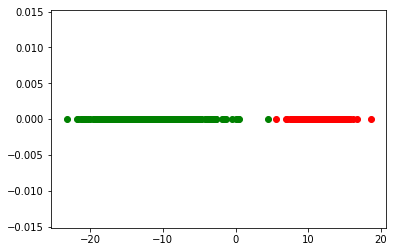

In [4]:
collapse0=[]
for i in range(train0.shape[0]):
    collapse0.append(np.dot(w,train0.iloc[i,:-1]))
    
collapse1=[]
for i in range(train1.shape[0]):
    collapse1.append(np.dot(w,train1.iloc[i,:-1]))

plt.scatter(collapse0,[0]*train0.shape[0],color='red')
plt.scatter(collapse1,[0]*train1.shape[0],color='green')

Text(-25, 0.1, 'mean = -11.29,  std = 4.39')

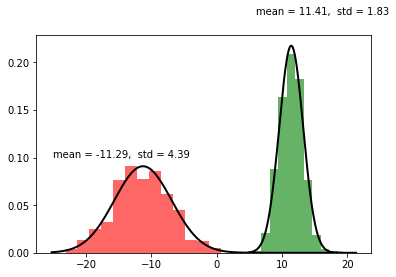

In [5]:
mean0,std0 = norm.fit(collapse0)
plt.hist(collapse0, bins=10, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
p = norm.pdf(x, mean0, std0)
plt.plot(x, p, 'k', linewidth=2)
title = "mean = %.2f,  std = %.2f" % (mean0, std0)
plt.text(6,0.25,title)


mean1,std1 = norm.fit(collapse1)
plt.hist(collapse1, bins=15, density=True, alpha=0.6, color='r')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
p = norm.pdf(x, mean1, std1)
plt.plot(x, p, 'k', linewidth=2)
title = "mean = %.2f,  std = %.2f" % (mean1, std1)
plt.text(-25,0.1,title)

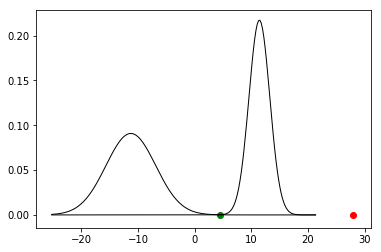

In [6]:
a = 1/(2*std0**2) - 1/(2*std1**2)
b = mean1/(std1**2) - mean0/(std0**2)
c = mean0**2 /(2*std0**2) - mean1**2 / (2*std1**2) - np.log(std1/std0)
pt_intersect = np.roots([a,b,c])

p = norm.pdf(x, mean0, std0)
plt.plot(x, p, 'k', linewidth=1)
p = norm.pdf(x, mean1, std1)
plt.plot(x, p, 'k', linewidth=1)
plt.scatter(pt_intersect[1],norm.pdf(pt_intersect[1],mean1,std1),color='green')
plt.scatter(pt_intersect[0],norm.pdf(pt_intersect[0],mean1,std1),color='red')

In [7]:
yactual = [int(i) for i in test.iloc[:,3]]
pred=[]
for i in range(test.shape[0]):
    proj = np.dot(w,test.iloc[i,:-1])
    if proj<=pt_intersect[1]:
        pred.append(1)
    else:
        pred.append(0)

In [9]:
# making the confusion matrix 
y_actu = pd.Series(yactual, name='Actual')
y_pred = pd.Series(pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

# calculating the precision and recall to calculate F score 
p = df_confusion.loc[0,0]/(df_confusion.loc[0,0]+df_confusion.loc[1,0])
r = df_confusion.loc[0,0]/(df_confusion.loc[0,0]+df_confusion.loc[0,1])
print(df_confusion)

Predicted    0    1
Actual             
0          100    0
1            0  100


In [10]:
# fcore and accuracy
acc = (df_confusion.loc[0,0]+df_confusion.loc[1,1])/(df_confusion.loc[0,0]+df_confusion.loc[1,1]+df_confusion.loc[0,1]+df_confusion.loc[1,0])
f_score = 2*p*r/(p+r)
print(acc,f_score)

1.0 1.0
